In [3]:
#Importing required packages
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd

In [2]:
# Extracting statements and labels from the dataset 
sentence,labels=[],[]
x=open("train.ft.txt",'rb')
for i in x:
    i=str(i)
    labels.append(int(i[11]))
    sentence.append(i[13:])
print(i)
x.close()

b"__label__2 Makes My Blood Run Red-White-And-Blue: I agree that every American should read this book -- and everybody else for that matter. I don't agree that it's scholarly. Rather, it's a joy to read -- easy to understand even for a person with two master's degrees! Between McElroy's chapter on How American Culture was Formed and Ken Burns' Lewis & Clark, I don't know which makes my blood run red-white-and-bluer. And as a child of the anti-establishment `60s, it's done a lot toward helping me understand why we Americans do what we do. It's the best history book I've ever read, the best history course I've ever taken or taught. I'm buying it for my home library for my grandchildren to use as a resource. We're also using it as a resource for a book on urban planning.\n"


In [3]:
# Setting up hyper-parameters for the training our model
vocab_size=10000
embedding_dim=16
max_length=120
trunc_type='post'
oov_tok="<OOV>"

In [ ]:
# Defining the layers for the model
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_length)),
    tf.keras.layers.Dense(vocab_size,activation='softmax')
])
model.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

In [4]:
# Making a splitting parameter for our dataset
t=int(0.01*len(sentence))
t

36000

In [5]:
# Splitting data into test and train
training_sentences,testing_sentences=sentence[:t],sentence[t:t+3600]
training_labels,testing_labels=labels[:t],labels[t:t+3600]

In [15]:
# Tokenizing our dataset and making a dictionary of words
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences[1:5])
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(training_sentences[1:5])
padded=pad_sequences(sequences,maxlen=max_length,truncating=trunc_type)
testing_sequences=tokenizer.texts_to_sequences(testing_sentences[1:5])
testing_padded=pad_sequences(testing_sequences,maxlen=max_length)

In [14]:
training_sentences[1:5]

['The best soundtrack ever to anything.: I\'m reading a lot of reviews saying that this is the best \'game soundtrack\' and I figured that I\'d write a review to disagree a bit. This in my opinino is Yasunori Mitsuda\'s ultimate masterpiece. The music is timeless and I\'m been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.\\n"',
 'Amazing!: This soundtrack is my favorite music of all time, hands down. The intense sadness of "Prisoners of Fate" (which means all the more if you\\\'ve played the game) and the hope in "A Distant Promise" and "Girl who Stole the Star" have been an important inspiration to me personally throughout my teen years. The higher energy tracks like "Chrono Cross ~ Time\\\'s Scar~", "Time of the Dreamwatch", and "Chronomantique" (indefinably remeniscent of Chrono Trigger) are 

In [16]:
word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'of': 4,
 'this': 5,
 'i': 6,
 'is': 7,
 'music': 8,
 'soundtrack': 9,
 'to': 10,
 'a': 11,
 'it': 12,
 'game': 13,
 'best': 14,
 'that': 15,
 'my': 16,
 'on': 17,
 'if': 18,
 'you': 19,
 'are': 20,
 'be': 21,
 'time': 22,
 'played': 23,
 'for': 24,
 'n': 25,
 'all': 26,
 'like': 27,
 'chrono': 28,
 'cross': 29,
 'stars': 30,
 'dreamers': 31,
 "i'm": 32,
 'in': 33,
 'yasunori': 34,
 'been': 35,
 'years': 36,
 'price': 37,
 'say': 38,
 'buy': 39,
 'one': 40,
 'would': 41,
 'worth': 42,
 'every': 43,
 'amazing': 44,
 'down': 45,
 'prisoners': 46,
 'fate': 47,
 "'ve": 48,
 'have': 49,
 'me': 50,
 "'s": 51,
 'scar': 52,
 'chronomantique': 53,
 "'t": 54,
 'can': 55,
 'excellent': 56,
 'truly': 57,
 'enjoy': 58,
 'video': 59,
 "it's": 60,
 'disk': 61,
 'three': 62,
 'god': 63,
 'sea': 64,
 'radical': 65,
 'jewel': 66,
 'ever': 67,
 'anything': 68,
 'reading': 69,
 'lot': 70,
 'reviews': 71,
 'saying': 72,
 "'game": 73,
 "soundtrack'": 74,
 'figured': 75,
 

In [ ]:
# Fitting our dataset into the model
history = model.fit(padded[:5000],np.array(training_labels[:5000]),
          epochs=10,validation_data=(testing_padded[:560],np.array(testing_labels[:560])))

In [ ]:
# Saving the model
model.save('my_model_4.h5')

In [11]:
sentence[0]

"Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\\n'"

In [55]:
tok=Tokenizer(num_words=1,oov_token=oov_tok)
tok.fit_on_texts(sentence[0])
word_ind=tok.word_index
seq=tok.texts_to_sequences(sentence[0])
#padded=pad_sequences(sequences,maxlen=max_length,truncating=trunc_type)
#testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
#testing_padded=pad_sequences(testing_sequences,maxlen=max_length)

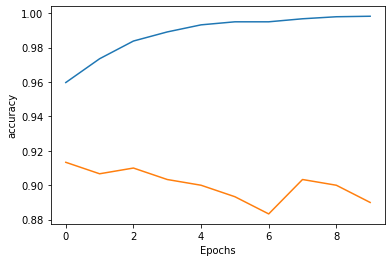

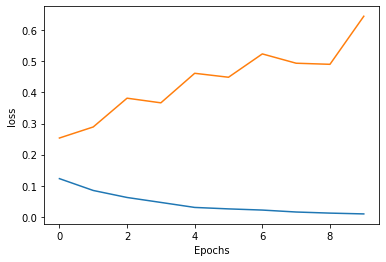

In [60]:
# Showing the trainig results in graphical format
import matplotlib.pyplot as plt
def graph_plot(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history["val_"+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
graph_plot(history,"accuracy")
graph_plot(history,"loss")

In [2]:
#Loading the live dataset 
data = pd.read_csv("embd.csv")

In [2]:
# Testing our saved model on the review dataset
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd

#Loading the model
model=tf.keras.models.load_model('my_model_4.h5')
#Tokenising the reviews on which the model is to be implemented
tokens=pd.read_csv("embd.csv")
tokens=tokens.iloc[:10001,:]
token={}
for i,j in zip(tokens['keys'],tokens['values']):
    token[i]=j
    
max_length=120
trunc_type='post'
#Predicting the class of the review 
def predict_output(X):
    X=X.lower()
    x_predict=[[token[i] if i in token else 1 for i in X.split()]]
    padded=pad_sequences(x_predict,maxlen=max_length,truncating=trunc_type)
    return "Positive" if model.predict_classes(padded)[0] == 1 else "Negative"

In [22]:
df = pd.read_csv('review-result.csv')

In [23]:
df.head()

,date,verified,review
0,"Reviewed in the United States on November 23, ...",Verified Purchase,\n\n Great value. The Nokia has a great scree...
1,"Reviewed in the United States on November 14, ...",Verified Purchase,\n\n Previous phone was a Nokia 2.2. This is...
2,"Reviewed in the United States on October 21, 2020",Verified Purchase,\n\n Latest Android sucks without back button...
3,"Reviewed in the United States on November 17, ...",Verified Purchase,\n\n The product is worth every penny.\n\n
4,"Reviewed in the United States on November 13, ...",Verified Purchase,\n\n It's an excellent phone with a beautiful...


In [24]:
predict_output(df['review'][48])

'Positive'

In [6]:
predict_output(df['review'][45])

'Positive'

In [4]:
df['review'][48]

'\n\n  please dont buy this phone. its complete crap. after 3 months. the entire phone screen is flickering continuously andunable to attend call. unable to attend password. i did factory reset and nothing works.if you want to waste your money buy it\n\n'

In [5]:
df['review'][45]

'\n\n  Nice phone\n\n'

In [28]:
dfreview.review[0]

'\n\n  Great value. The Nokia has a great screen, battery life, and provides 2 years of Android OS updates (from date of release). It also comes with TPU case which is great because 2.4 cases can be hard to find. Not a lot of bloat ware which is good because the phone only come with 32GB out of the box (2GB of RAM). I immediately added 64GB via a microSD card. Fingerprint reader on the back is convenient but you must place your finger carefully to avoid multiple reads. Some software like Outlook and Teams don’t load as quickly as the usual suspects do but that may be because the are running in a Work profile. I was considering a factory unlocked phone from Motorola but like the design, value, and build quality of this new phone from Nokia.\n\n'

In [4]:
print(countp, countn)

335 189


In [17]:
# The combined code to get live reviews from the amazon site and reviewing the rating of the product

#Importing the required packages
from tensorflow.keras import models
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import csv

#Loading the model
model=models.load_model('my_model_4.h5')
tokens=pd.read_csv("embd.csv")
tokens=tokens.iloc[:10001,:]
max_length=120
trunc_type='post'
token={}
for i,j in zip(tokens['keys'],tokens['values']):
    token[i]=j
with open('review-result.csv', 'w', newline = '', encoding = 'utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['date', 'verified', 'review'])
df = pd.DataFrame()
# selenium functions
def get_url(search_term):
    """Genrate a url from search term"""
    template = "https://www.amazon.com/s?k={}"
    search_term = search_term.replace(" ","+")
    
    #add term query to url
    url = template.format(search_term)
    
    #add page query placeholder
    url += "&page={}"
    
    return url

def extract_record(item):
    """Extract and return data from a single record"""
    
    try:
        #description and url
        atag = item.h2.a
        desc = atag.text.strip()
        url = 'https://www.amazon.com' + atag.get('href')
    except AttributeError:
        return
    
    try:
        #price
        price_parent = item.find('span','a-price')
        price = price_parent.find('span', 'a-offscreen').text
    except AttributeError:
        return
    
    try:
        #rank and rating
        rating = item.i.text
        review_count = item.find('span',{'class': 'a-size-base', 'dir': 'auto'}).text
    except AttributeError:
        rating = ''
        review_count = ''
    
    result = (desc, price, rating, review_count, url)
    return result

def pmain(search_term):
    """Run main program routine"""
    # stratup the webdriver
    options = webdriver.ChromeOptions()
    options.add_argument('headless')
    options.add_argument('window-size=1200x600')
    driver_path = 'chromedriver.exe'
    driver = webdriver.Chrome(driver_path,options=options)
    records = []
    url = get_url(search_term)
    
    for page in range(1,2):
        driver.get(url.format(page))
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        results = soup.find_all('div', {'data-component-type': 's-search-result'})
        for itm in results:
            record = extract_record(itm)
            if record:
                records.append(extract_record(itm))
    driver.close()
    #save data to csv file
    with open('result.csv', 'w', newline = '', encoding = 'utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['desc', 'price', 'rating', 'review_count', 'Url'])
        writer.writerows(records)
# seelenuium function end
def r_get_url(template):
    """Genrate a url from search term"""
    
    url = template.replace("dp","product-reviews")+'&pageNumber={}'+'&sortBy=recent'
    
    return url

def r_extract_record(item):
    """Extract and return data from a single record"""
    stop = 1
    try:
        #review date
        date = item.find('span',{'data-hook':'review-date'}).text
        #if int(date[-4:])<2020:
         #   stop = 0
        
    except AttributeError:
        return 
    
    try:
        #review
        review = item.find('span',{'data-hook':'review-body'}).text
    except AttributeError:
        return
    
    try:
        #verify purchase
        verified = item.find('span',{'data-hook':'avp-badge'}).text
    except AttributeError:
        return
    
    result = (date, verified, review)
    return result, stop

def r_main(template):
    """Run main program routine"""
    # stratup the webdriver
    
    options = webdriver.ChromeOptions()
    options.add_argument('headless')
    options.add_argument('window-size=1200x600')
    driver_path = 'chromedriver.exe'
    driver = webdriver.Chrome(driver_path,options=options)
    url = r_get_url(template)
    records = []
    stop = 1
    page=0
    for i in range(0,2):
        page+=1
        driver.get(url.format(page))
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        results = soup.find_all('div', {'data-hook': 'review'})
        for itm in results:
            r = r_extract_record(itm)
            
            if r:
                #stop = r[-1]
                records.append(r[0])
    driver.close()
    
    #save data to csv file
    with open('review-result.csv', 'w', newline = '', encoding = 'utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['date', 'verified', 'review'])
        writer.writerows(records)

def predict_output(X):
    max_length=120
    trunc_type='post'
    X=X.lower()
    x_predict=[[token[i] if i in token else 1 for i in X.split()]]
    padded=pad_sequences(x_predict,maxlen=max_length,truncating=trunc_type)
    return "Positive" if model.predict_classes(padded)[0] == 1 else "Negative"



def predict(x):
    global df

    input_features = x
    pmain(input_features)
    df=pd.read_csv("result.csv")
    for i in range(min(5,df.shape[0])):
        r_main(df["Url"][i])
        
    
    #validate input hours
    dfreview=pd.read_csv('review-result.csv')  
    
    countp=0
    for i in range(dfreview.shape[0]):
        output = predict_output(dfreview.review[i])
        if(output=="Positive"):
            countp=countp+1
    countn=dfreview.shape[0]-countp
    data = {'Task' : 'Reviews', 'Positive' : countp, 'Negative' : countn}
    # input and predicted value store in df then save in csv file
    print(data)

    


In [18]:
predict("Oppo Smart Phones")

{'Task': 'Reviews', 'Positive': 10, 'Negative': 10}


In [6]:
df.Url[0]

'https://www.amazon.com/LG-Electronics-24LJ4540-24-Inch-Model/dp/B01N2Z17MS/ref=sr_1_1?dchild=1&keywords=LG+smart+TV&qid=1613024872&sr=8-1'